## Aula 03

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#dados = pd.read_csv("https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true")

# Armazenando os dados do arquivo .csv em um Dataframe chamado dados
dados = pd.read_csv("dataset/MICRODADOS_ENEM_2019.csv")
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,506.0,509.0,514.0,517.0,435.6,512.3,488.6,432.4,DACDDEDEDAADCBCBDBDBBBDCCACDECADCCCBCBACCCCEA,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,1,1,0,NaN,508.0,512.0,NaN,NaN,409.3,375.3,NaN,NaN,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,503.0,508.0,512.0,515.0,423.2,499.1,441.0,427.2,DDEACAECCC*BCDBAACDACCBAEBBCEEEAECABBCECBBEAA,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,19000100473

In [2]:
# Delimitando quais colunas possuem provas
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

# Criando uma coluna no DataFrame contendo a soma das cinco provas
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)

In [3]:
# Removendo os inscritos que possuem nota total 0
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

dados_sem_notas_zero[["NU_NOTA_TOTAL", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]].head()

,NU_NOTA_TOTAL,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
0,2288.9,435.6,512.3,432.4,488.6,420.0
1,1184.6,NaN,409.3,NaN,375.3,400.0
2,2350.5,423.2,499.1,427.2,441.0,560.0
3,2555.7,426.2,578.1,499.9,551.5,500.0
4,2803.5,516.5,571.3,424.5,511.2,780.0


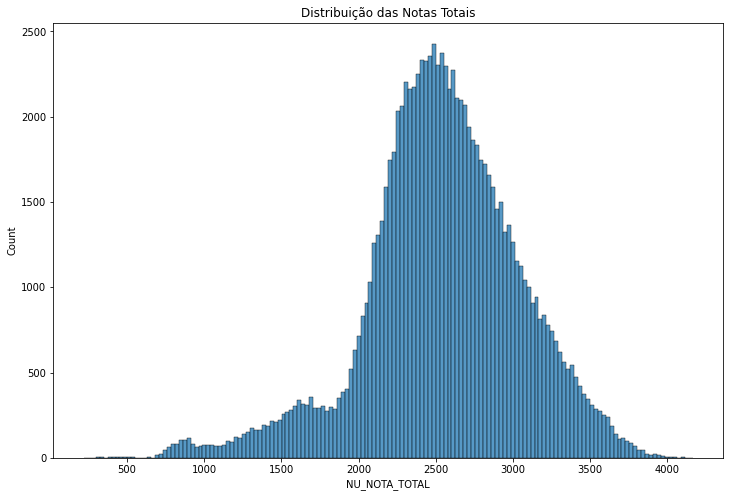

In [4]:
# Plotando um histograma das notas totais sem as notas zero
plt.figure(figsize=(12,8))
plt.title("Distribuição das Notas Totais")
sns.histplot(dados_sem_notas_zero, x="NU_NOTA_TOTAL");

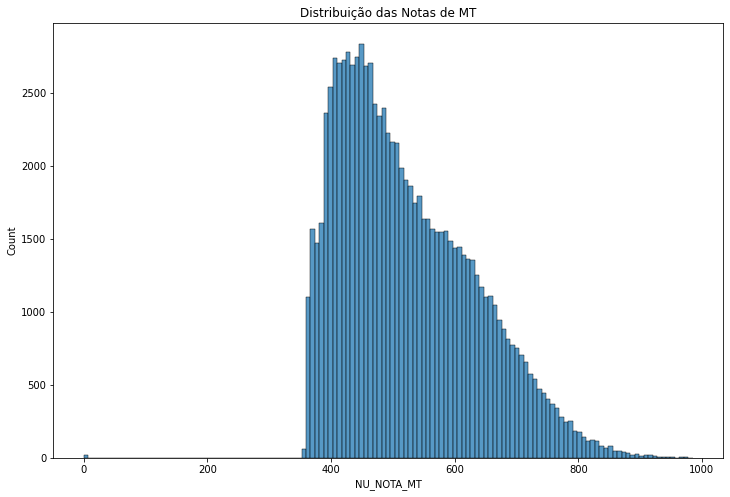

In [5]:
# Plotando um histograma das notas de MT sem as notas zero
plt.figure(figsize=(12,8))
plt.title("Distribuição das Notas de MT")
sns.histplot(dados_sem_notas_zero, x="NU_NOTA_MT");

<AxesSubplot:title={'center':'Distribuição das Notas de LC'}, xlabel='NU_NOTA_LC', ylabel='Count'>

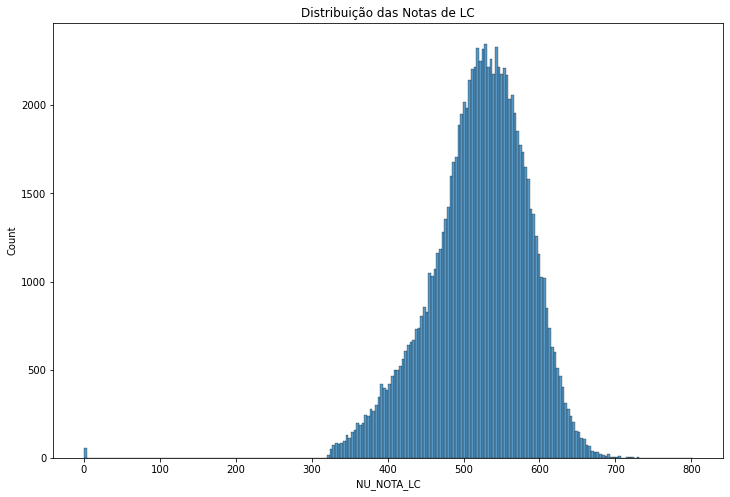

In [6]:
# Plotando um histograma das notas de LC sem as notas zero
plt.figure(figsize=(12,8))
plt.title("Distribuição das Notas de LC")
sns.histplot(dados_sem_notas_zero, x="NU_NOTA_LC")

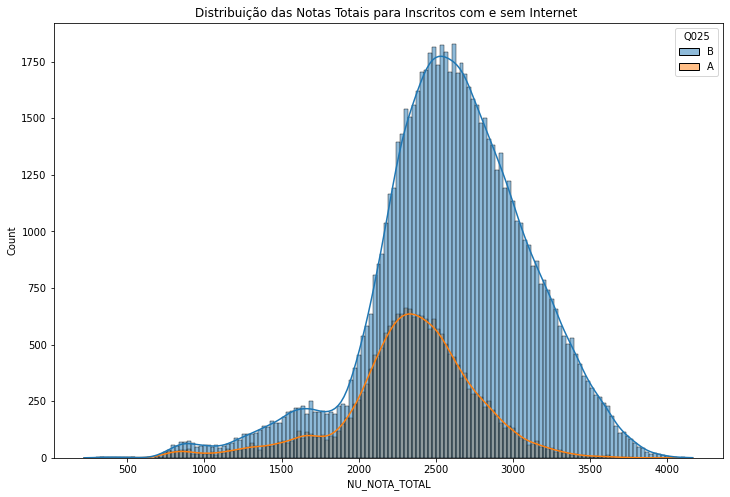

In [7]:
# Plotando um histograma das notas totais sem as notas zero para pessoas que possuem ou não Internet
plt.figure(figsize=(12,8))
plt.title("Distribuição das Notas Totais para Inscritos com e sem Internet ")
sns.histplot(dados_sem_notas_zero, x="NU_NOTA_TOTAL", hue="Q025", kde=True);

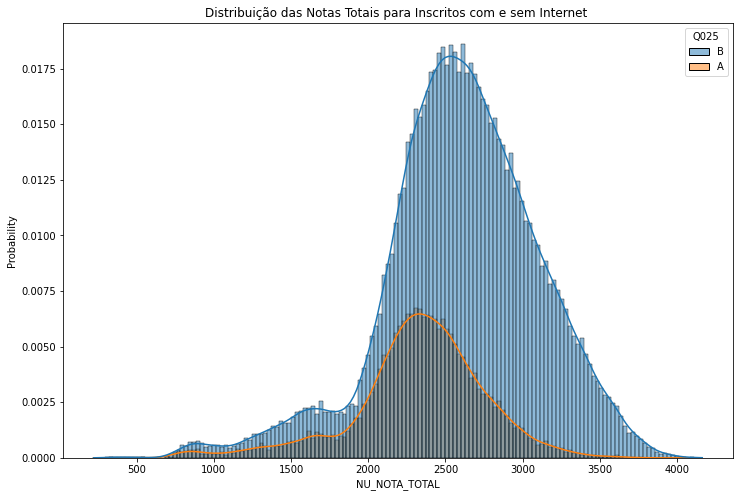

In [8]:
# Plotando a probabilidade das notas totais sem as notas zero para pessoas que possuem ou não Internet
plt.figure(figsize=(12,8))
plt.title("Distribuição das Notas Totais para Inscritos com e sem Internet ")
sns.histplot(dados_sem_notas_zero, x="NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability");

<AxesSubplot:title={'center':'Distribuição das Notas Totais para Inscritos com e sem Internet '}, xlabel='NU_NOTA_TOTAL', ylabel='Density'>

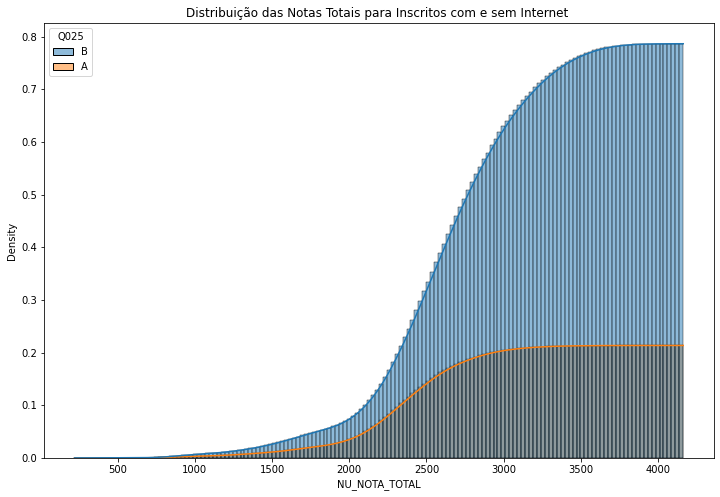

In [9]:
# Plotando a densidade das notas totais sem as notas zero para pessoas que possuem ou não Internet
plt.figure(figsize=(12,8))
plt.title("Distribuição das Notas Totais para Inscritos com e sem Internet ")
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)

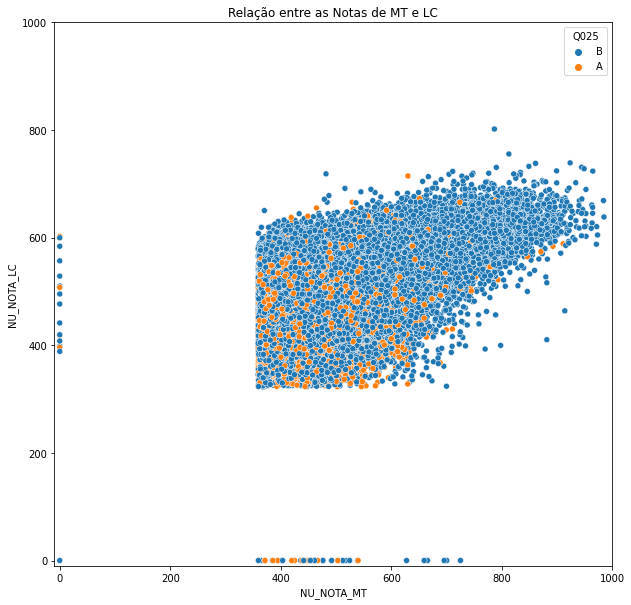

In [10]:
# Plotando um scatterplot entre as notas de MT e LC
plt.figure(figsize=(10, 10))
plt.title("Relação entre as Notas de MT e LC")
sns.scatterplot(data = dados_sem_notas_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
plt.xlim((-10, 1000))
plt.ylim((-10, 1000))

plt.show()

In [11]:
# Delimitando quais colunas possuem provas
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

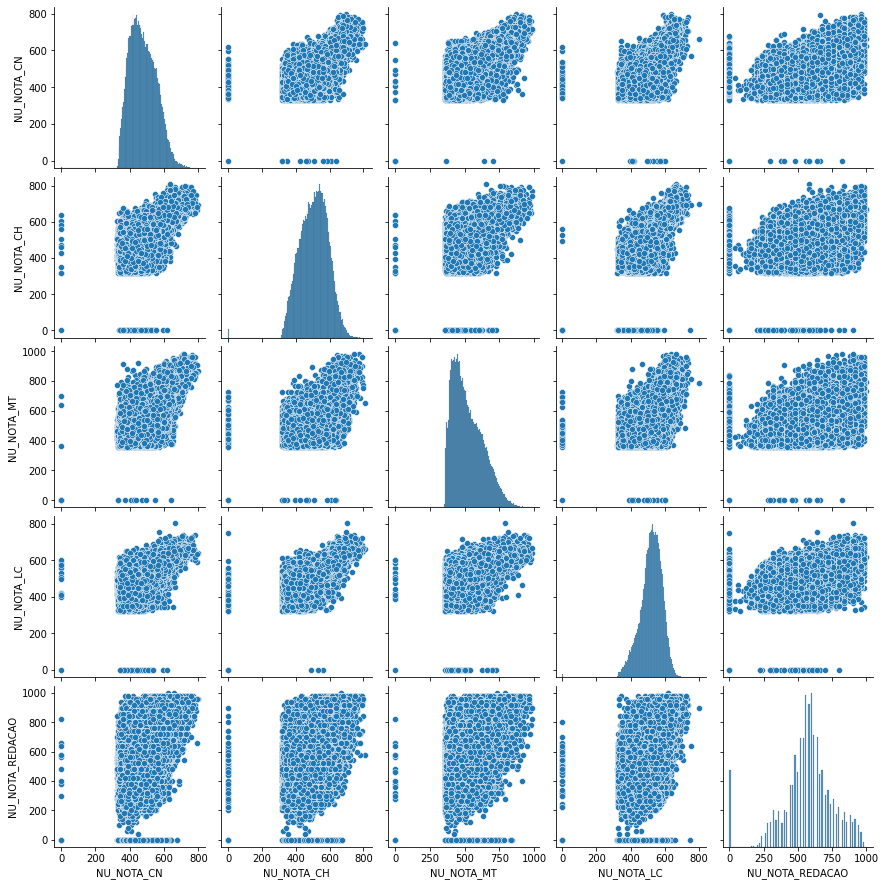

In [12]:
# Plotando a comparação entre todas as provas
sns.pairplot(dados_sem_notas_zero[provas]);

In [13]:
# Observando a correlação entre as notas das provas
correlacao = dados_sem_notas_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000


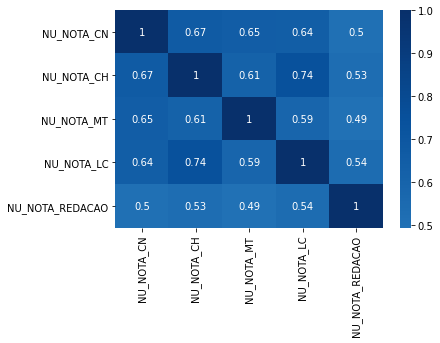

In [14]:
# Plotando um mapa de correlação evidenciando as correlações entre as notas das provas
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True);

Desafio 1: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)

Desafio 2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.

In [65]:
dados_sem_notas_zero['NU_NOTA_LC'].mode()[0]

528.5

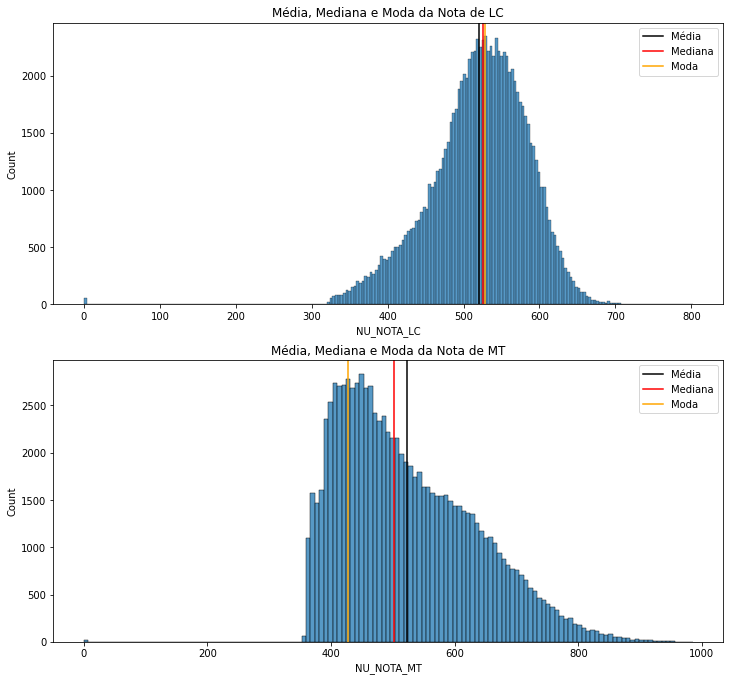

<Figure size 864x576 with 0 Axes>

In [70]:
# Desafio 1: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)

fig, axes = plt.subplots(2, figsize=(12, 8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=1.2, wspace=None, hspace=None)
plt.figure(figsize=(12,8))

# Escrevendo o titulo e plotando o histograma da distribuição das notas de LC
axes[0].set_title('Média, Mediana e Moda da Nota de LC')
sns.histplot(dados_sem_notas_zero, x="NU_NOTA_LC", ax=axes[0])

# Desenhando as linhas verticais e preenchendo a legenda
axes[0].axvline(dados_sem_notas_zero['NU_NOTA_LC'].mean(), color='black', label='Média')
axes[0].axvline(dados_sem_notas_zero['NU_NOTA_LC'].median(), color='red', label='Mediana')
axes[0].axvline(dados_sem_notas_zero['NU_NOTA_LC'].mode()[0], color='orange', label='Moda')
axes[0].legend(loc='upper right')

axes[1].set_title('Média, Mediana e Moda da Nota de MT')
sns.histplot(dados_sem_notas_zero, x="NU_NOTA_MT", ax=axes[1])

# Desenhando as linhas verticais e preenchendo a legenda
axes[1].axvline(dados_sem_notas_zero['NU_NOTA_MT'].mean(), color='black', label='Média')
axes[1].axvline(dados_sem_notas_zero['NU_NOTA_MT'].median(), color='red', label='Mediana')
axes[1].axvline(dados_sem_notas_zero['NU_NOTA_MT'].mode()[0], color='orange', label='Moda')
axes[1].legend(loc='upper right')

plt.show();

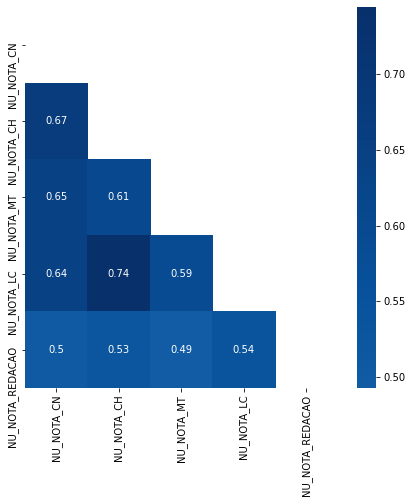

In [22]:
# Desafio 2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.

# Gerando uma mascara para o triangulo superior da figura
mascara = np.triu(np.ones_like(correlacao, dtype=bool))
plt.figure(figsize=(7, 7))
sns.heatmap(correlacao, mask=mascara, cmap="Blues", center=0, annot=True);